# Pythia: Data Navigation

After we have obtain some shares and/or currencies, now we are interested in obtaining lists of the data that we've got, including some of its characteristics like last update time, currency, range, etc.

Finally the objective is to load some of the data and plot it.

```
   1.a List currencies
   1.b List stocks
   2. Load data from specific symbols
   3. Plot the data
   4. Select Fx data
```

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,matplotlib -g

import sys
from os import path, pardir
from math import pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import watermark

from ipywidgets import interact
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from bokeh.io import push_notebook, output_notebook
from bokeh.plotting import figure, show

register_matplotlib_converters()
plt.style.use('seaborn-deep')
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_colwidth', -1)

sys.path.append(path.abspath(pardir))

CPython 3.7.5
IPython 7.10.0

numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.2

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 16
interpreter: 64bit
Git hash   : 069ca71f3516cf9c1a14773e1598bd13e62ddfa3


In [2]:
from src.api_manager import *
from src.overall_commands import *
from src import graphs
from src.fx_tools import FxManager

### 1a. List of available currencies

In [3]:
get_fx_table(v=0)

,From,To,Period,FirstTimeStamp,LastUpdate,TimeZone,Information
0,GBP,CNY,daily,2008-09-04T00:00:00,2019-12-27 15:45:00,None,"Forex Daily Prices (open, high, low, close)"
1,GBP,CNY,monthly,2008-10-31T00:00:00,2019-12-27,None,"Forex Monthly Prices (open, high, low, close)"
2,GBP,EUR,daily,2001-11-08T00:00:00,2019-12-27 16:00:00,None,"Forex Daily Prices (open, high, low, close)"
3,GBP,EUR,monthly,2001-12-31T00:00:00,None,None,"Forex Monthly Prices (open, high, low, close)"
4,GBP,INR,daily,2014-11-07T00:00:00,2019-12-27 15:10:00,None,"Forex Daily Prices (open, high, low, close)"
5,GBP,INR,monthly,2014-12-31T00:00:00,2019-12-27,None,"Forex Monthly Prices (open, high, low, close)"
6,GBP,USD,daily,2001-12-03T00:00:00,2019-12-27 16:00:00,None,"Forex Daily Prices (open, high, low, close)"
7,GBP,USD,monthly,2002-01-31T00:00:00,2019-12-27 16:00:00,None,"Forex Monthly Prices (open, high, low, close)"


In [4]:
get_fx_table(mode="crypto", v=0)

,From,To,Period,FirstTimeStamp,LastUpdate,TimeZone,Information
0,BTC,GBP,monthly,2017-09-30T00:00:00,None,UTC,Monthly Prices and Volumes for Digital Currency
1,BTC,GBP,daily,2017-08-17T00:00:00,None,None,Daily Prices and Volumes for Digital Currency
2,ETH,GBP,monthly,2017-09-30T00:00:00,2019-12-27 00:00:00,UTC,Monthly Prices and Volumes for Digital Currency
3,ETH,GBP,daily,2017-08-17T00:00:00,2019-12-27 00:00:00,UTC,Daily Prices and Volumes for Digital Currency
4,USDT,GBP,monthly,2018-12-31T00:00:00,None,UTC,Monthly Prices and Volumes for Digital Currency
5,USDT,GBP,daily,2018-11-30T00:00:00,None,UTC,Daily Prices and Volumes for Digital Currency
6,XRP,GBP,monthly,2018-06-30T00:00:00,None,UTC,Monthly Prices and Volumes for Digital Currency
7,XRP,GBP,daily,2018-05-04T00:00:00,2019-12-27 00:00:00,UTC,Daily Prices and Volumes for Digital Currency


### 1b. List of Stocks

In [6]:
df_shares = get_stocks_table(v=0)

In [6]:
df_shares

,Symbol,Period,Currency,Name,Type,Region,FirstTimeStamp,LastUpdate,TimeZone
0,3P7.FRK,monthly-adjusted,None,None,None,None,2010-11-30T00:00:00,2019-12-27,US/Eastern
1,3P7.FRK,daily-adjusted,None,None,None,None,2010-10-14T00:00:00,2019-12-27,US/Eastern
2,3P7.FRK,monthly,None,None,None,None,2010-11-30T00:00:00,2019-12-27,US/Eastern
3,3P7.FRK,daily,None,None,None,None,2010-10-14T00:00:00,2019-12-27,US/Eastern
4,ABE.MDR,daily,EUR,None,None,None,1987-05-18T00:00:00,None,None
5,AMAT,monthly-adjusted,USD,None,Equity,United States,2000-01-31T00:00:00,None,None
6,AMAT,daily-adjusted,USD,None,Equity,United States,1999-12-09T00:00:00,None,None
7,AMAT,monthly,USD,Applied Materials Inc.,Equity,United States,2000-01-31T00:00:00,2019-12-27 10:40:28,US/Eastern
8,AMAT,daily,USD,None,None,None,1999-12-08T00:00:00,2019-12-27 09:42:31,US/Eastern
9,AMZN,monthly-adjusted,None,None,Equity,United States,2000-01-31T00:00:00,None,None


In [7]:
print(f"Number of unique symbols: {df_shares.Symbol.nunique()}")

Number of unique symbols: 42


### 2. Load data from a specific symbol

In [8]:
amzn = load_stock_data("AMZN")

Text(0, 0.5, 'close')

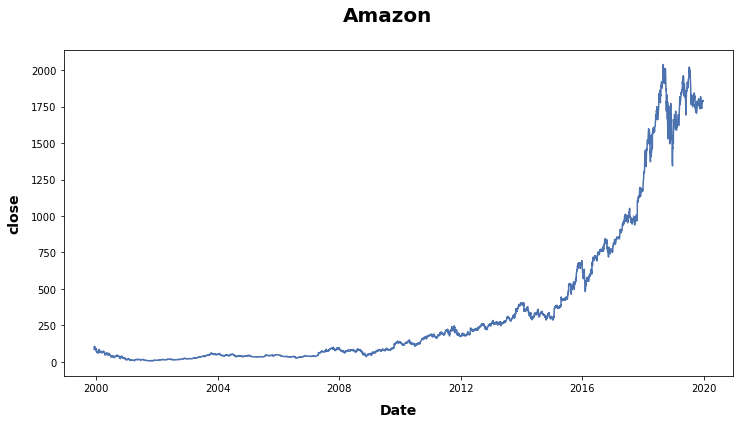

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.plot(amzn.close, label='Close Price history');
fig.suptitle('Amazon', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('close', fontsize=14, weight='bold', labelpad=10)

### 3. Interactive graph

In [10]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
output_notebook()

df_daily_adj = df_shares[df_shares["Period"]=="daily-adjusted"]
periods = ["daily-adjusted", "monthly-adjusted", "daily", "monthly"]

data = load_stock_data("AMAT", period="daily-adjusted")
inc = data.close > data.open
dec = data.open > data.close
w = 12 * 60 * 60 * 1000  # half day in ms
p = figure(x_axis_type="datetime", tools=TOOLS, title="AMAT", plot_width=700, plot_height=300)
p.xaxis.major_label_orientation = pi / 4
p.grid.grid_line_alpha = 0.3
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
s1 = p.segment(data.index, data.high, data.index, data.low, color="black")
r1 = p.vbar(data.index[inc], w, data.open[inc], data.close[inc], fill_color='#B2DF8A', line_color="green")
r2 = p.vbar(data.index[dec], w, data.open[dec], data.close[dec], fill_color="#FA8072", line_color="red")

Loading BokehJS ...

In [11]:
def update_candlestick(stock, period="daily-adjusted"):
    data = load_stock_data(stock, period=period)
    
    inc = data.close > data.open
    dec = data.open > data.close
    w = 12 * 60 * 60 * 1000  # half day in ms
    p.title.text = stock + ' Chart'
    s1.data_source.data = {}
    s1.data_source.data['x0'] = data.index
    s1.data_source.data['y0'] = data.high
    s1.data_source.data['x1'] = data.index
    s1.data_source.data['y1'] = data.low
    p.renderers.pop()
    p.renderers.pop()
    p.vbar(data.index[inc], w, data.open[inc], data.close[inc], fill_color='#B2DF8A', line_color="green")
    p.vbar(data.index[dec], w, data.open[dec], data.close[dec], fill_color="#FA8072", line_color="red")
    push_notebook()

In [12]:
show(p, notebook_handle=True);

In [13]:
interact(update_candlestick, stock=df_daily_adj["Symbol"].tolist(), period=periods);

interactive(children=(Dropdown(description='stock', options=('3P7.FRK', 'AMAT', 'AMZN', 'ASML.AMS', 'ATVI', 'B…

### 4. Load Fx data

In [14]:
fx_mng = FxManager()

In [114]:
ini = "2015-08-06"
end = ini

In [115]:
rst = fx_mng.query("GBP", "USD", date_ini=ini, date_end=end)

In [116]:
rst

,open,high,low,close
date,,,,
2015-08-06,1.56,1.5637,1.5466,1.551


In [117]:
mmm = load_stock_data("DIS", date_ini=ini, date_end=end)

In [118]:
mmm

,open,high,low,close,volume
date,,,,,
2015-08-06,110.4,110.4,104.24,108.55,57162413
